<a href="https://colab.research.google.com/github/vincekq/vehicles_ml/blob/master/vehicle_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/vincekq/vehicles_ml.git

fatal: destination path 'vehicles_ml' already exists and is not an empty directory.


In [0]:
from fastai import *
from fastai.vision import *


In [0]:
path = Path('/content/vehicles_ml')

In [0]:
for file, folder in [('/content/vehicles_ml/airplanes/airplanes.txt', '/content/vehicles_ml/airplanes'), ('/content/vehicles_ml/cars/cars.txt', '/content/vehicles_ml/cars'), 
                     ('/content/vehicles_ml/motorbikes/motorbikes.txt', '/content/vehicles_ml/motorbikes')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

In [0]:
for folder in ('/content/vehicles_ml/airplanes', '/content/vehicles_ml/cars', '/content/vehicles_ml/motorbikes'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)


In [0]:

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [8]:
data.classes


['airplanes', 'cars', 'motorbikes']

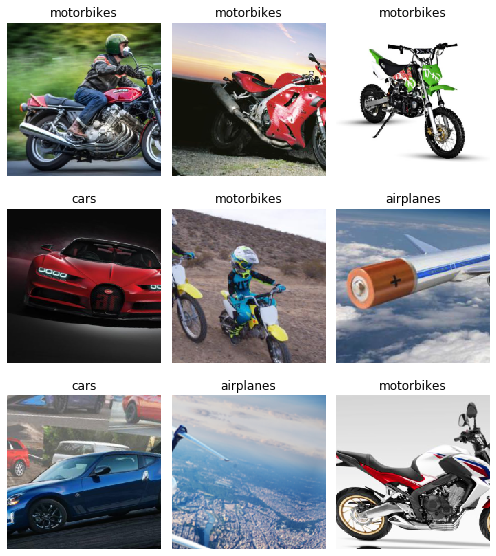

In [9]:
data.show_batch(rows=3, figsize=(7, 8))


In [0]:
from fastai.metrics import error_rate # 1 - accuracy


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [12]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.846626,0.794392,0.218182,01:15
1,0.988641,0.242218,0.072727,01:15
2,0.682592,0.150129,0.036364,01:14
3,0.519721,0.115169,0.036364,01:15


In [0]:
learn.unfreeze()


In [14]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


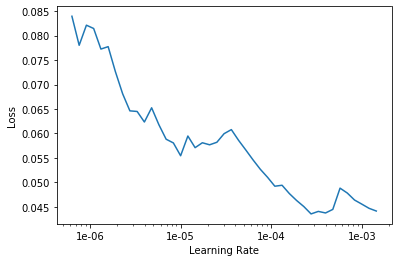

In [15]:
learn.recorder.plot()


In [16]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.021622,0.116671,0.018182,01:43
1,0.029608,0.084971,0.018182,01:43


In [0]:
learn.save('vehicle-stage-1')


In [0]:
from fastai.widgets import *


In [0]:
learn.save('stage-2')


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


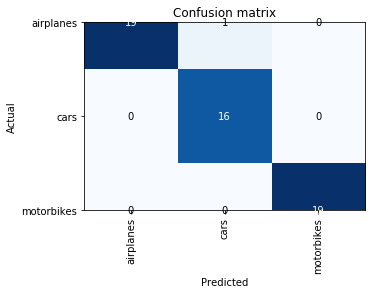

In [21]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)

In [27]:
data.classes


['airplanes', 'cars', 'motorbikes']

In [69]:
print(data.classes, data.c, len(data.train_ds), len(data.valid_ds))
print(db.classes, db.c, len(db.train_ds), len(db.valid_ds))

['airplanes', 'cars', 'motorbikes'] 3 223 55
['airplanes', 'cars', 'motorbikes'] 3 179 44


In [0]:
ducati = open_image('/content/ducati.jpg')

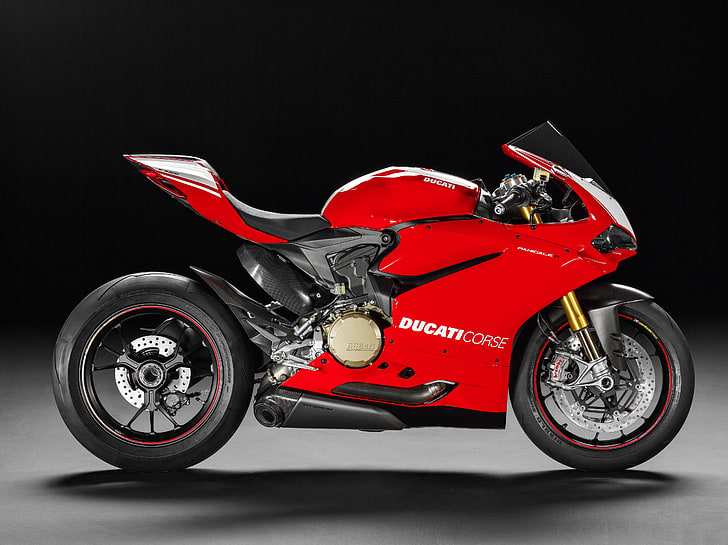

In [74]:
ducati

In [71]:
df = pd.read_csv(path/'/content/vehicles_ml/cleaned.csv', header='infer')
print(df.head())

db = (ImageList.from_df(df, path)
                   .split_by_rand_pct(0.2)
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch(bs=8)).normalize(imagenet_stats)

                     name      label
0  airplanes/00000063.jpg  airplanes
1  airplanes/00000035.jpg  airplanes
2  airplanes/00000018.jpg  airplanes
3  airplanes/00000028.jpg  airplanes
4  airplanes/00000039.jpg  airplanes


In [0]:
data2 = ImageDataBunch.single_from_classes(path, data.classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet34)


In [73]:
pred_class,pred_idx,outputs = learn.predict(ducati)
pred_class

Category motorbikes

In [0]:
trotro = open_image('/content/trotro.jpg')

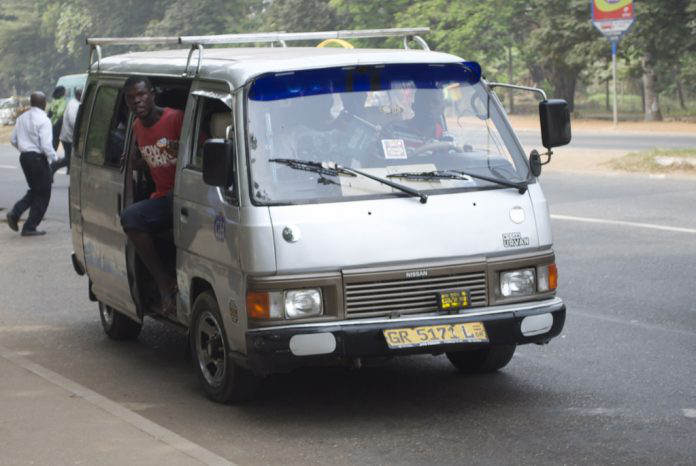

In [76]:
trotro

In [77]:
data2 = ImageDataBunch.single_from_classes(path, data.classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet50)
                


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 95.9MB/s]


In [78]:
pred_class,pred_idx,outputs = learn.predict(ducati)
pred_class

Category cars